Análise de Mudanças Climáticas do Azure Notebook

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns; sns.set()

Importar Dados

In [4]:
yearsBase, meanBase = np.loadtxt('5-year-mean-1951-1980.csv', delimiter=',', usecols=(0, 1), unpack=True)
years, mean = np.loadtxt('5-year-mean-1882-2014.csv', delimiter=',', usecols=(0, 1), unpack=True)

Criar um gráfico de dispersão

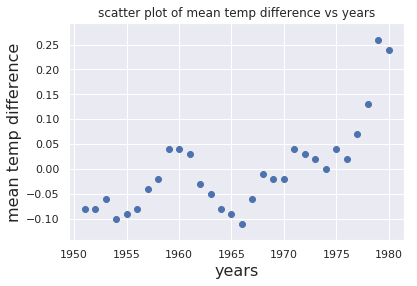

In [7]:
plt.scatter(yearsBase, meanBase)
plt.title('scatter plot of mean temp difference vs years')
plt.xlabel('years', fontsize=16)
plt.ylabel('mean temp difference', fontsize=16)
plt.show()

        Gráfico de dispersão produzido pelo Matplotlib

O conjunto de dados carregado usa uma média de 30 anos entre 1951 e 1980 para calcular uma temperatura base para esse período e, em seguida, usa temperaturas médias de 5 anos para calcular a diferença entre a média de 5 anos e a média de 30 anos de cada ano. O gráfico de dispersão mostra as diferenças de temperatura anuais.

<b>Executar regressão linear</b>

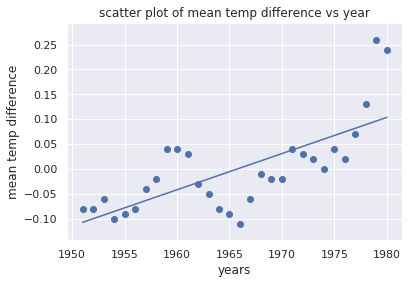

 y = 0.007279199110122221 * x + -14.309265850945222


In [8]:
# Creates a linear regression from the data points
m,b = np.polyfit(yearsBase, meanBase, 1)

# This is a simple y = mx + b line function
def f(x):
    return m*x + b

# This generates the same scatter plot as before, but adds a line plot using the function above
plt.scatter(yearsBase, meanBase)
plt.plot(yearsBase, f(yearsBase))
plt.title('scatter plot of mean temp difference vs year')
plt.xlabel('years', fontsize=12)
plt.ylabel('mean temp difference', fontsize=12)
plt.show()

# Prints text to the screen showing the computed values of m and b
print(' y = {0} * x + {1}'.format(m, b))
plt.show()

        Gráfico de dispersão com linha de regressão

Na linha de regressão, você pode ver que a diferença entre as temperaturas médias de 30 anos e as temperaturas médias de 5 anos está aumentando ao longo do tempo. A maior parte do trabalho computacional necessário para gerar a linha de regressão foi feita pela função <b>polyfit</b> do NumPy, que calculou os valores m e b na equação y = mx + b.

<b>Executar regressão linear com o Scikit-learn</b>

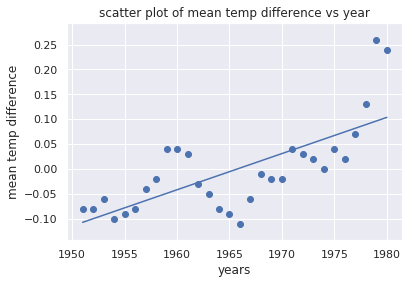

 y = 0.007279199110122357 * x + -14.309265850945492


In [10]:
# Pick the Linear Regression model and instantiate it
model = LinearRegression(fit_intercept=True)

# Fit/build the model
model.fit(yearsBase[:, np.newaxis], meanBase)
mean_predicted = model.predict(yearsBase[:, np.newaxis])

# Generate a plot like the one in the previous exercise
plt.scatter(yearsBase, meanBase)
plt.plot(yearsBase, mean_predicted)
plt.title('scatter plot of mean temp difference vs year')
plt.xlabel('years', fontsize=12)
plt.ylabel('mean temp difference', fontsize=12)
plt.show()

print(' y = {0} * x + {1}'.format(model.coef_[0], model.intercept_))

Gráfico de dispersão com linha de regressão calculada pelo Scikit-learn

A saída é quase idêntica à saída do exercício anterior. A diferença é que o Scikit-learn fez a maior parte do trabalho para você. Especificamente, você não precisou codificar uma função de linha como fez com o NumPy; a função LinearRegression do Scikit-learn fez isso para você. O Scikit-learn é compatível com muitos diferentes tipos regressão, que são úteis na criação de modelos de machine learning sofisticados.

<b>Executar regressão linear com o Seaborn</b>

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


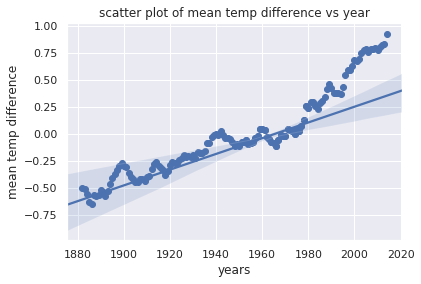

In [11]:
plt.scatter(years, mean)
plt.title('scatter plot of mean temp difference vs year')
plt.xlabel('years', fontsize=12)
plt.ylabel('mean temp difference', fontsize=12)
sns.regplot(yearsBase, meanBase)
plt.show()

Comparação dos valores reais e previstos gerados com o Seaborn

Observe como os pontos de dados para os primeiros 100 anos estão em perfeita conformidade com os valores previstos, ao contrário dos pontos de dados de aproximadamente 1980 em diante. São modelos como esses que levam os cientistas a acreditar que as mudanças climáticas estão sendo aceleradas.